In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import percentileofscore
import itertools
%matplotlib inline

/Users/chaitanya/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from investing.data import bse

In [4]:
df = bse.sensex()

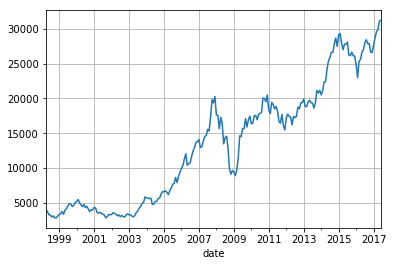

In [5]:
df.close.plot(grid=True)

In [6]:
df[['pe', 'pb', 'dividend_yield']].describe()

,pe,pb,dividend_yield
count,231.000000,231.000000,231.000000
mean,18.498874,3.311905,1.517922
std,3.355868,0.904305,0.371603
min,10.270000,1.730000,0.850000
25%,16.510000,2.720000,1.230000
50%,18.350000,3.040000,1.440000
75%,20.690000,3.710000,1.750000
max,29.390000,6.540000,2.520000


In [7]:
df[['y1', 'y2', 'y3', 'y5', 'y10']].describe()

,y1,y2,y3,y5,y10
count,219.000000,207.000000,195.000000,171.000000,111.000000
mean,0.165586,0.332901,0.559446,1.190574,3.102442
std,0.297959,0.464591,0.699100,1.227729,1.215908
min,-0.530412,-0.409876,-0.397160,-0.261310,0.931286
25%,-0.050842,-0.018180,0.102982,0.348180,2.216763
50%,0.140264,0.244933,0.334461,0.718707,3.145464
75%,0.384635,0.636774,0.834029,1.509247,4.097768
max,0.956727,1.513582,3.068721,5.726293,5.589718


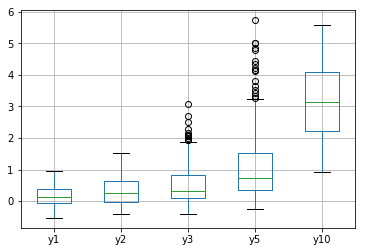

In [8]:
df[['y1', 'y2', 'y3', 'y5', 'y10']].boxplot(return_type='axes')

In [9]:
df[['ay1', 'ay2', 'ay3', 'ay5', 'ay10']].describe()

,ay1,ay2,ay3,ay5,ay10
count,219.000000,207.000000,195.000000,171.000000,111.000000
mean,0.165586,0.137268,0.136975,0.146842,0.146614
std,0.297959,0.199286,0.160077,0.111665,0.036775
min,-0.530412,-0.231805,-0.155238,-0.058777,0.068033
25%,-0.050842,-0.009133,0.033211,0.061572,0.123935
50%,0.140264,0.115766,0.100953,0.114398,0.152809
75%,0.384635,0.279364,0.224055,0.202009,0.176896
max,0.956727,0.585428,0.596440,0.464047,0.207499


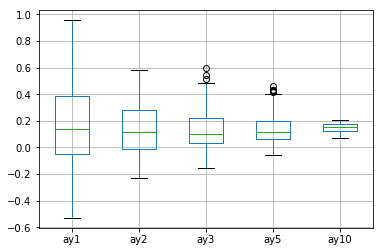

In [10]:
ax = df[['ay1', 'ay2', 'ay3', 'ay5', 'ay10']].boxplot(return_type='axes')

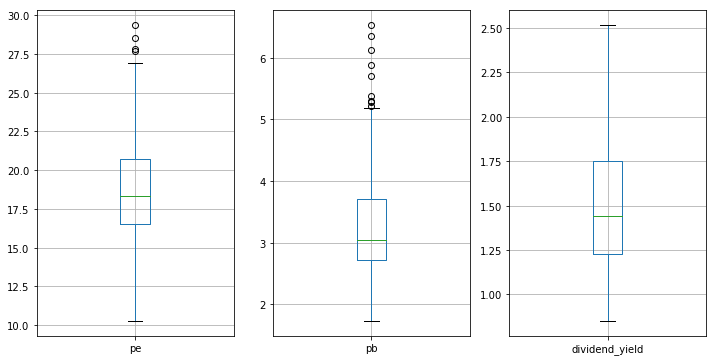

In [11]:
f, a = plt.subplots(1, 3, figsize=(12,6))
df[['pe']].boxplot(return_type='axes', ax=a[0])
df[['pb']].boxplot(return_type='axes', ax=a[1])
df[['dividend_yield']].boxplot(return_type='axes', ax=a[2])

In [12]:
print(df.pe.median(), df.pe[-1], df.pe[-1]/df.pe.median(), df.close[-1]*(1/(df.pe[-1]/df.pe.median())))

18.35 22.62 1.23269754768 25360.6896994


In [13]:
print(percentileofscore(df.pe, df.pe[-1]))
print(percentileofscore(df.pb, df.pb[-1]))
print(percentileofscore(df.dividend_yield, df.dividend_yield[-1]))

91.341991342
40.2597402597
31.1688311688


[('pe', 'y1'), ('pe', 'y2'), ('pe', 'y3'), ('pe', 'y5'), ('pe', 'y10'), ('pb', 'y1'), ('pb', 'y2'), ('pb', 'y3'), ('pb', 'y5'), ('pb', 'y10'), ('dividend_yield', 'y1'), ('dividend_yield', 'y2'), ('dividend_yield', 'y3'), ('dividend_yield', 'y5'), ('dividend_yield', 'y10')]
Axes(0.125,0.657941;0.133621x0.222059) ('pe', 'y1')
Axes(0.285345,0.657941;0.133621x0.222059) ('pe', 'y2')
Axes(0.44569,0.657941;0.133621x0.222059) ('pe', 'y3')
Axes(0.606034,0.657941;0.133621x0.222059) ('pe', 'y5')
Axes(0.766379,0.657941;0.133621x0.222059) ('pe', 'y10')
Axes(0.125,0.391471;0.133621x0.222059) ('pb', 'y1')
Axes(0.285345,0.391471;0.133621x0.222059) ('pb', 'y2')
Axes(0.44569,0.391471;0.133621x0.222059) ('pb', 'y3')
Axes(0.606034,0.391471;0.133621x0.222059) ('pb', 'y5')
Axes(0.766379,0.391471;0.133621x0.222059) ('pb', 'y10')
Axes(0.125,0.125;0.133621x0.222059) ('dividend_yield', 'y1')
Axes(0.285345,0.125;0.133621x0.222059) ('dividend_yield', 'y2')
Axes(0.44569,0.125;0.133621x0.222059) ('dividend_yield', 

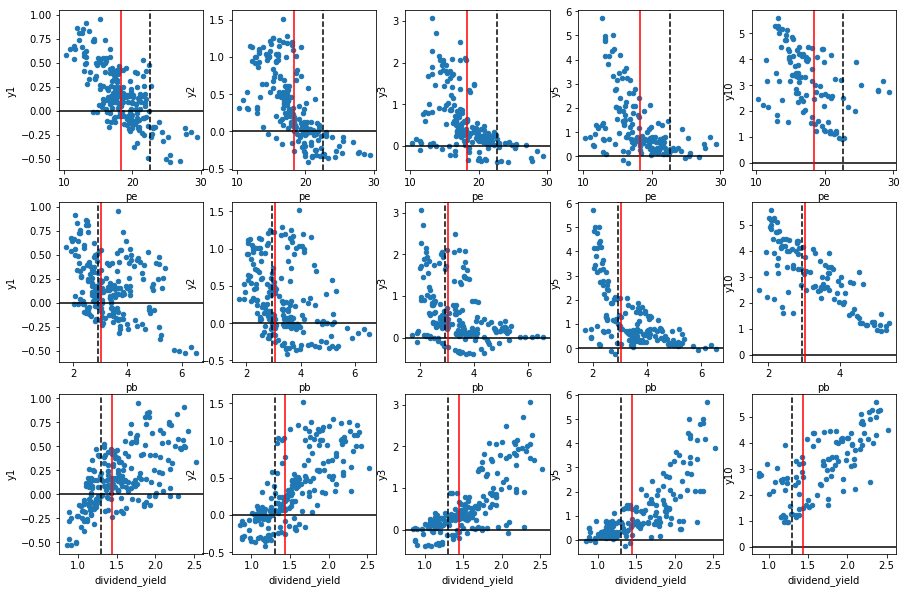

In [14]:
f, a = plt.subplots(3, 5, figsize=(15, 10))
#a = np.ndarray.flatten(a)
a = a.flatten()
py = list(itertools.product(['pe', 'pb', 'dividend_yield'], ['y1', 'y2', 'y3', 'y5', 'y10']))
print(py)
for ax, py in zip(a, py):
    print(ax, py)
    p, y = py
    ax = df.plot(kind='scatter', x = p, y = y, ax = ax)
    ax.axhline(0, color='k')
    ax.axvline(df[p].median(), color='r')
    ax.axvline(df[p][-1], color='k', linestyle='--')

[('pe', 'ay1'), ('pe', 'ay2'), ('pe', 'ay3'), ('pe', 'ay5'), ('pe', 'ay10'), ('pb', 'ay1'), ('pb', 'ay2'), ('pb', 'ay3'), ('pb', 'ay5'), ('pb', 'ay10'), ('dividend_yield', 'ay1'), ('dividend_yield', 'ay2'), ('dividend_yield', 'ay3'), ('dividend_yield', 'ay5'), ('dividend_yield', 'ay10')]
Axes(0.125,0.657941;0.133621x0.222059) ('pe', 'ay1')
Axes(0.285345,0.657941;0.133621x0.222059) ('pe', 'ay2')
Axes(0.44569,0.657941;0.133621x0.222059) ('pe', 'ay3')
Axes(0.606034,0.657941;0.133621x0.222059) ('pe', 'ay5')
Axes(0.766379,0.657941;0.133621x0.222059) ('pe', 'ay10')
Axes(0.125,0.391471;0.133621x0.222059) ('pb', 'ay1')
Axes(0.285345,0.391471;0.133621x0.222059) ('pb', 'ay2')
Axes(0.44569,0.391471;0.133621x0.222059) ('pb', 'ay3')
Axes(0.606034,0.391471;0.133621x0.222059) ('pb', 'ay5')
Axes(0.766379,0.391471;0.133621x0.222059) ('pb', 'ay10')
Axes(0.125,0.125;0.133621x0.222059) ('dividend_yield', 'ay1')
Axes(0.285345,0.125;0.133621x0.222059) ('dividend_yield', 'ay2')
Axes(0.44569,0.125;0.133621x0.

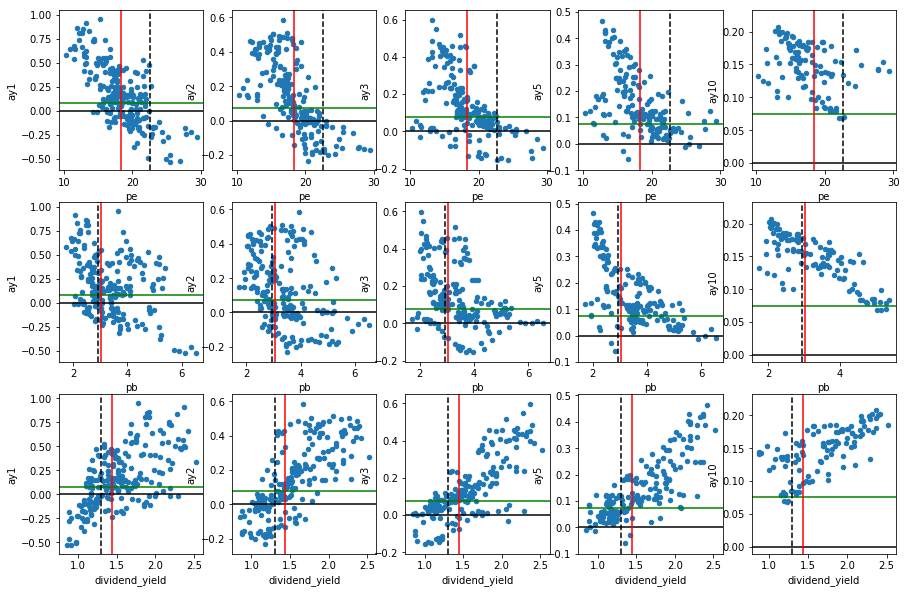

In [15]:
f, a = plt.subplots(3, 5, figsize=(15, 10))
#a = np.ndarray.flatten(a)
a = a.flatten()
py = list(itertools.product(['pe', 'pb', 'dividend_yield'], ['ay1', 'ay2', 'ay3', 'ay5', 'ay10']))
print(py)
for ax, py in zip(a, py):
    print(ax, py)
    p, y = py
    ax = df.plot(kind='scatter', x = p, y = y, ax = ax)
    ax.axhline(0, color='k')
    ax.axhline(0.075, color='g')
    ax.axvline(df[p].median(), color='r')
    ax.axvline(df[p][-1], color='k', linestyle='--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114b22fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1176531d0>]], dtype=object)

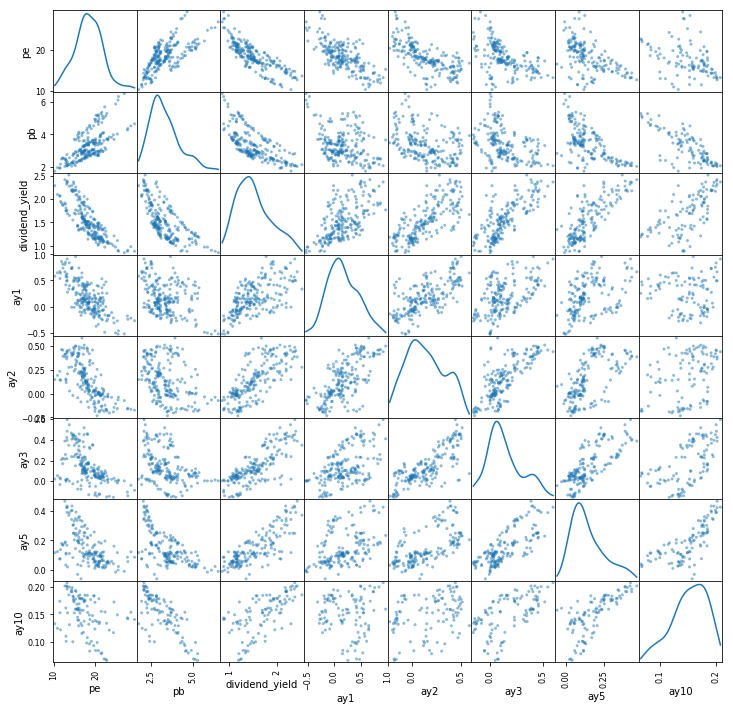

In [16]:
pd.plotting.scatter_matrix(df[['pe', 'pb', 'dividend_yield', 'ay1', 'ay2', 'ay3', 'ay5', 'ay10']], diagonal='kde', figsize=(12,12))

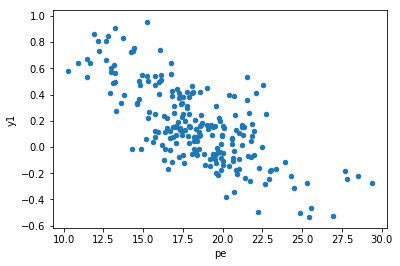

In [16]:
df.plot(kind='scatter', x='pe', y='y1')

In [17]:
smf.ols('y1 ~ dividend_yield', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sun, 11 Jun 2017   Prob (F-statistic):           6.17e-25
Time:                        01:25:21   Log-Likelihood:                 8.7036
No. Observations:                 219   AIC:                            -13.41
Df Residuals:                     217   BIC:                            -6.629
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5782      0.065     -8.850      0.000      -0.707      -0.449
dividend_yield     0.4879      0.042     11.732      0.000       0.406       0.570
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.689
Skew:                           0.124   Prob(JB):                        0.430
Kurtosis:                       2.649   Cond. No.                         9.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117cedef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119024e48>]], dtype=object)

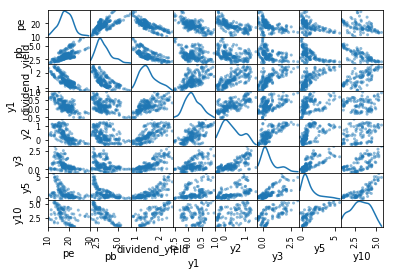

In [18]:
plt.figure(figsize=(10,6))
pd.plotting.scatter_matrix(df[['pe', 'pb', 'dividend_yield', 'y1', 'y2', 'y3', 'y5', 'y10']], diagonal='kde')

In [19]:
df.y1.describe()

count    219.000000
mean       0.165586
std        0.297959
min       -0.530412
25%       -0.050842
50%        0.140264
75%        0.384635
max        0.956727
Name: y1, dtype: float64

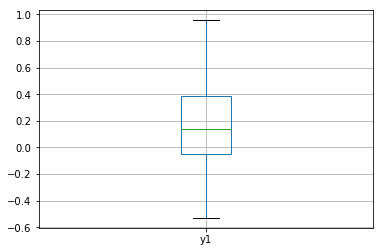

In [20]:
df[['y1']].boxplot()

In [21]:
df.describe()

,high,low,close,pe,pb,dividend_yield,y1,y2,y3,y5,y10,ay1,ay2,ay3,ay5,ay10
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,219.000000,207.000000,195.000000,171.000000,111.000000,219.000000,207.000000,195.000000,171.000000,111.000000
mean,13872.835455,12681.213506,13378.333766,18.498874,3.311905,1.517922,0.165586,0.332901,0.559446,1.190574,3.102442,0.165586,0.137268,0.136975,0.146842,0.146614
std,8766.591766,8308.777207,8608.145326,3.355868,0.904305,0.371603,0.297959,0.464591,0.699100,1.227729,1.215908,0.297959,0.199286,0.160077,0.111665,0.036775
min,3027.200000,2594.870000,2810.660000,10.270000,1.730000,0.850000,-0.530412,-0.409876,-0.397160,-0.261310,0.931286,-0.530412,-0.231805,-0.155238,-0.058777,0.068033
25%,4935.370000,4255.835000,4639.880000,16.510000,2.720000,1.230000,-0.050842,-0.018180,0.102982,0.348180,2.216763,-0.050842,-0.009133,0.033211,0.061572,0.123935
50%,14576.370000,12800.910000,13786.910000,18.350000,3.040000,1.440000,0.140264,0.244933,0.334461,0.718707,3.145464,0.140264,0.115766,0.100953,0.114398,0.152809
75%,20085.175000,18324.555000,19371.480000,20.690000,3.710000,1.750000,0.384635,0.636774,0.834029,1.509247,4.097768,0.384635,0.279364,0.224055,0.202009,0.176896
max,31430.320000,31062.020000,31262.060000,29.390000,6.540000,2.520000,0.956727,1.513582,3.068721,5.726293,5.589718,0.956727,0.585428,0.596440,0.464047,0.207499


In [22]:
df.tail(2)

,high,low,close,pe,pb,dividend_yield,y1,y2,y3,y5,y10,ay1,ay2,ay3,ay5,ay10
date,,,,,,,,,,,,,,,,
2017-05-01,31255.28,29804.12,31145.80,22.72,2.94,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,31430.32,31062.02,31262.06,22.62,2.93,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


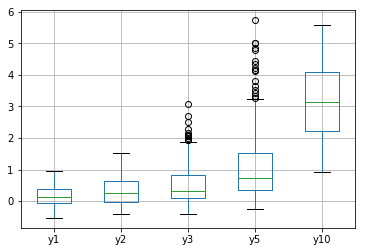

In [23]:
df[['y1', 'y2', 'y3', 'y5', 'y10']].boxplot()

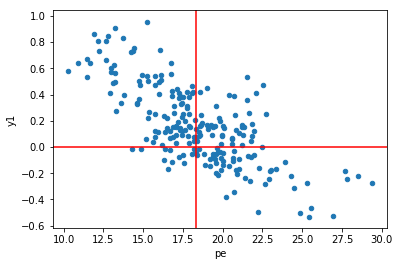

In [27]:
ax = df.plot(kind='scatter', x='pe', y='y1')
ax.axhline(0, color='r')
ax.axvline(df.pe.median(), color='r')

In [28]:
df.sort_values(by='y10', ascending=False)

,high,low,close,pe,pb,dividend_yield,y1,y2,y3,y5,y10,ay1,ay2,ay3,ay5,ay10
date,,,,,,,,,,,,,,,,
2003-04-01,3221.90,2904.44,2959.79,13.21,2.06,2.37,0.910639,1.079350,3.068721,4.840722,5.589718,0.910639,0.441995,0.596440,0.423290,0.207499
2002-10-01,3038.92,2828.48,2949.32,12.68,2.02,2.42,0.663729,0.923247,1.675980,5.726293,5.274456,0.663729,0.386812,0.388335,0.464047,0.201594
2002-09-01,3227.62,2973.97,2991.36,13.13,2.17,2.32,0.488701,0.866579,1.886473,4.780347,5.272311,0.488701,0.366228,0.423822,0.420335,0.201553
2003-05-01,3200.48,2934.78,3180.75,13.21,2.06,2.39,0.496383,1.111172,2.269232,4.160912,5.212466,0.496383,0.452987,0.484164,0.388498,0.200401
2003-03-01,3311.57,3039.83,3048.72,13.74,2.14,2.28,0.833753,1.129687,2.699900,4.131478,5.178255,0.833753,0.459345,0.546666,0.386911,0.199738
2003-01-01,3416.92,3199.18,3250.38,14.43,2.25,2.17,0.752309,1.016976,2.051917,4.429737,5.120817,0.752309,0.420203,0.450522,0.402671,0.198618
2002-11-01,3245.98,2928.63,3228.82,13.22,2.07,2.36,0.562435,0.930826,1.721988,4.996987,4.989773,0.562435,0.389542,0.396246,0.430825,0.196027
2001-10-01,3083.65,2718.41,2989.35,14.29,2.04,2.29,-0.013391,0.641450,0.897493,3.336026,4.922696,-0.013391,0.281191,0.238017,0.340968,0.194681
2001-09-01,3267.93,2594.87,2811.60,15.20,2.07,2.19,0.063935,0.583881,0.985919,3.429656,4.852098,0.063935,0.258523,0.256957,0.346710,0.193249


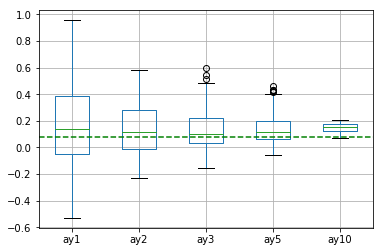

In [35]:
ax = df[['ay1', 'ay2', 'ay3', 'ay5', 'ay10']].boxplot(return_type='axes')
ax.axhline(0.08, color='g', linestyle='--')

In [36]:
df[df.ay5 < 0.08][['pe', 'pb', 'dividend_yield', 'ay5']]

,pe,pb,dividend_yield,ay5
date,,,,
1998-04-01,16.55,2.83,1.35,-0.058777
1998-05-01,15.74,2.69,1.42,-0.029075
1998-06-01,13.32,2.28,1.69,0.021027
1998-07-01,12.91,2.23,1.81,0.033835
1998-08-01,11.46,1.92,2.06,0.076670
1998-09-01,11.50,1.92,2.08,0.074976
1999-05-01,15.76,2.91,1.44,0.037283
1999-06-01,16.53,3.06,1.37,0.029795
1999-07-01,18.40,3.40,1.23,0.026237
